<h4>Загружаем и читаем данные</h4>

In [13]:
import numpy as np # linear algebra
import math
import random

patterns = []
classes = []

#читаем дата сет
filename = 'Iris_data.txt'
file = open(filename,'r')

for line in file.readlines():
    row = line.strip().split(',')
    patterns.append(row[0:4])
    classes.append(row[4])
print("Iris Data Загружены")
file.close

patterns = np.asarray(patterns,dtype=np.float32)
#print(patterns)

sample_no = np.random.randint(0,len(patterns))

print("Образец датасета: " + str(patterns[int(sample_no)]))
print("Класс вышеупомянутого датасета: " + str(classes[int(sample_no)]))
    

Iris Data Загружены
Образец датасета: [5.1 3.8 1.9 0.4]
Класс вышеупомянутого датасета: Iris-setosa


In [20]:
import matplotlib.pyplot as plt # для графиков
#позволяет визуализировать график внутри блокнота
%matplotlib inline  

#функция для вычисления эвклидова расстояния
def Eucli_dists(MAP,x):
    x = x.reshape((1,1,-1))
    #print(x)
    Eucli_MAP = MAP - x
    Eucli_MAP = Eucli_MAP**2
    Eucli_MAP = np.sqrt(np.sum(Eucli_MAP,2))
    return Eucli_MAP
 
    
input_dimensions = 4

map_width = 9
map_height = 5

MAP = np.random.uniform(size=(map_height,map_width,input_dimensions)) #создаю нейроны со случайными весами
prev_MAP = np.zeros((map_height,map_width,input_dimensions))

#определяем нач радиус и скорость обучения
radius0 = max(map_width,map_height)/2
learning_rate0 = 0.1

coordinate_map = np.zeros([map_height,map_width,2],dtype=np.int32) #новый массив заполненный нулями

for i in range(0,map_height):
    for j in range(0,map_width):
        coordinate_map[i][j] = [i,j]

#определяем параметры для сети        
epochs = 500
radius=radius0
learning_rate = learning_rate0
max_iterations = len(patterns)+1
too_many_iterations = 10*max_iterations

sblizhenie = [1]

timestep=1
e=0.001 
flag=0

epoch=0
while epoch<epochs: # в течение нескольких эпох
    
    shuffle = np.random.randint(len(patterns), size=len(patterns))
    for i in range(len(patterns)): # for each input
        
        # разница между prev_MAP and MAP # вычисляю ошибку, сколько изменилось
        J = np.linalg.norm(MAP - prev_MAP)  
        #print(J)
        # J = || евклидово расстояние между предыдущей MAP и текущей MAP ||

        if  J <= e: #если есть схождение сближение (критерии сходимости)
            flag=1
            break
            
        else:
            #присваиваю рандомные 
            pattern = patterns[shuffle[i]]                              #случайный ввод
            pattern_ary = np.tile(pattern, (map_height, map_width, 1))  #повторяем значения
            Eucli_MAP = np.linalg.norm(pattern_ary - MAP, axis=2)       #вычисляем норму матрицы #найти вес каждому нейрону
            
            # Получаем наилучшую единицу соответствия- победителя (BMU), которая имеет наименьшее евклидово расстояние.
            BMU = np.unravel_index(np.argmin(Eucli_MAP, axis=None), Eucli_MAP.shape) # из возможных нейронов
        
            prev_MAP = np.copy(MAP)          #сохраняю карту перед
             
            for i in range(map_height):
                for j in range(map_width):
                    distance = np.linalg.norm([i - BMU[0], j - BMU[1]])           # если он находится поблизости
                    if distance <= radius:                                        # проверить наличие расстояния
                        
                        MAP[i][j] = MAP[i][j] + learning_rate*(pattern-MAP[i][j]) #регулируем веса карты
            
            learning_rate = learning_rate0*(1-(epoch/epochs))    #корректирую параметры
            
            radius = radius0*math.exp(-epoch/epochs)
            #print([learning_rate, radius])
            
            timestep+=1
    
    if J < min(sblizhenie):
        print('Найдена меньшая ошибка: %s' %str(J) + ' в эпохе: %s' % str(epoch))
        print('\tСкорость обучения: ' + str(learning_rate))
        print('\tРадиус соседства: ' + str(radius))
        MAP_final = MAP
        
    sblizhenie.append(J)
    
    if flag==1:
        break
    epoch+=1

Найдена меньшая ошибка: 0.9842172485402655 в эпохе: 1
	Скорость обучения: 0.0998
	Радиус соседства: 4.491008994002999
Найдена меньшая ошибка: 0.694037910869535 в эпохе: 2
	Скорость обучения: 0.09960000000000001
	Радиус соседства: 4.482035952047962
Найдена меньшая ошибка: 0.5109920934003143 в эпохе: 5
	Скорость обучения: 0.099
	Радиус соседства: 4.455224251871257
Найдена меньшая ошибка: 0.44552774993380423 в эпохе: 12
	Скорость обучения: 0.0976
	Радиус соседства: 4.393285693910592
Найдена меньшая ошибка: 0.4247994712551105 в эпохе: 16
	Скорость обучения: 0.0968
	Радиус соседства: 4.358279619356389
Найдена меньшая ошибка: 0.41255380882685483 в эпохе: 45
	Скорость обучения: 0.09100000000000001
	Радиус соседства: 4.1126903337205265
Найдена меньшая ошибка: 0.3305845383408764 в эпохе: 48
	Скорость обучения: 0.09040000000000001
	Радиус соседства: 4.088088072309178
Найдена меньшая ошибка: 0.20624530827101367 в эпохе: 56
	Скорость обучения: 0.0888
	Радиус соседства: 4.023199158751607
Найдена ме

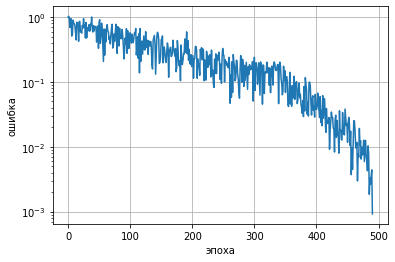

Кол-во шагов: 73380
Окончательная ошибка: 0.000919734026938525


In [21]:
# График ошибки на каждой эпохе
plt.plot(sblizhenie)
plt.ylabel('ошибка')
plt.xlabel('эпоха')
plt.grid(True)
plt.yscale('log')
plt.show()
print('Кол-во шагов: ' + str(timestep))
print('Окончательная ошибка: ' + str(J))

Красный = Iris-Setosa
Синий = Iris-Virginica
Зеленый = Iris-Versicolor


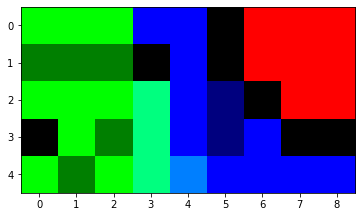

In [19]:
# Визуализация
from PIL import Image
import numpy as np

BMU = np.zeros([2],dtype=np.int32)
result_map = np.zeros([map_height,map_width,3],dtype=np.float32)

i=0
for pattern in patterns: # for each input
    
    pattern_ary = np.tile(pattern, (map_height, map_width, 1)) 
    Eucli_MAP = np.linalg.norm(pattern_ary - MAP_final, axis=2) # вычислияю, к какому нейрону этот вход наиболее близок

    # Получить наилучшую единицу соответствия - победителя (BMU), которая имеет наименьшее евклидово расстояние.
    BMU = np.unravel_index(np.argmin(Eucli_MAP, axis=None), Eucli_MAP.shape)
    #print(i, BMU)
    
    x = BMU[0]
    y = BMU[1]
    
    if classes[i] == 'Iris-setosa':
        if result_map[x][y][0] <= 0.5:
            result_map[x][y] += np.asarray([0.5,0,0])
    elif classes[i] == 'Iris-virginica':
        if result_map[x][y][1] <= 0.5:
            result_map[x][y] += np.asarray([0,0.5,0])
    elif classes[i] == 'Iris-versicolor':
        if result_map[x][y][2] <= 0.5:
            result_map[x][y] += np.asarray([0,0,0.5])
    i+=1
result_map = np.flip(result_map,0)
    
#print result_map

print("Красный = Iris-Setosa")
print("Синий = Iris-Virginica")
print("Зеленый = Iris-Versicolor")

plt.imshow(result_map, interpolation='nearest')

<span>Каждый пиксель представляет собой узел</span><br>
<span>Если пиксель ярко окрашен (цвет не смешен с другим), это означает, что многие модели класса, под таким же цветом, активируют этот пиксель, т.е. этот пиксель является лучшим узлом соответствия для многих моделей того же класса.</span><br>
<span>А пиксели более темного цвета являются лучшими единицами соответствия только для нескольких паттернов класса, представленного данным цветом.</span><br>
<span>Черные пиксели не являются пикселями наилучшего соответствия ни для одного из входных шаблонов.</span><br>
<span>Если же цвет представляет собой смесь двух цветов (например, "синевато-зеленый"), то пиксель представляет собой "серую область", то есть пиксель является наилучшей единицей соответствия для деталей разных классов.</span>